In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Normal Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

In [ ]:
mu = 78 
sigma = np.sqrt(35)
x = 72

In [ ]:
1-stats.norm.cdf(x,mu,sigma)

0.8447527828413826

b. Suppose that students scoring in the top 10% of this distribution are to receive an **A** grade.
What is the minimum score a student must achieve to earn an **A** grade?

In [ ]:
q = 1 - 0.1
q

0.9

In [ ]:
stats.norm.ppf(q, loc=mu, scale=sigma)

85.58176130791807

c. What must be the cutoff point for passing the examination if the examiner wants only the
top 28.1% of all scores to be passing?

In [ ]:
q = 1 - 0.281

In [ ]:
stats.norm.ppf(q, mu, sigma)

81.43057725369893

d. Approximately what proportion of students have scores 5 or more points above the score
that cuts off the lowest 25%?

In [ ]:
q1 = 0.25
x1 = stats.norm.ppf(q1, mu, sigma)
x1

74.00966482495706

In [ ]:
1 - stats.norm.cdf(x1+5, mu, sigma)

0.43224378728491386

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

## t Distribution
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

In [ ]:
dof = 15
q = 0.95

In [ ]:
stats.t.ppf(q, dof)

1.7530503556925547

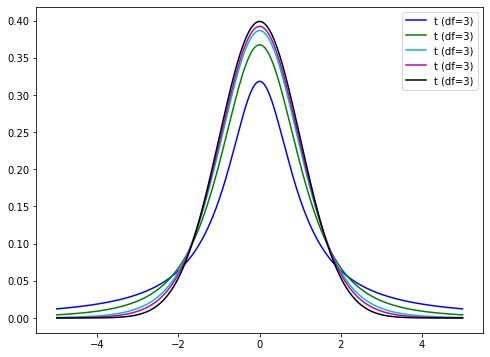

In [ ]:
plt.figure(figsize=(8,6))
xs = np.linspace(-5,5,1000)

plt.plot(xs, stats.t.pdf(xs,1), "b", label = "t (df=3)")            # df = degrees of freedom (serbestlik derecesi)
plt.plot(xs, stats.t.pdf(xs,3), "g", label = "t (df=3)")            # t dağılımımız
plt.plot(xs, stats.t.pdf(xs,8), "c", label = "t (df=3)") 
plt.plot(xs, stats.t.pdf(xs,15), "m", label = "t (df=3)") 
plt.plot(xs, stats.norm.pdf(xs), "k", label = "t (df=3)")           # this is normal distribution.
plt.legend()
plt.show()

## Confidence Intervals Using the Normal Distribution

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [ ]:
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [ ]:
tips = sns.load_dataset("tips")
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


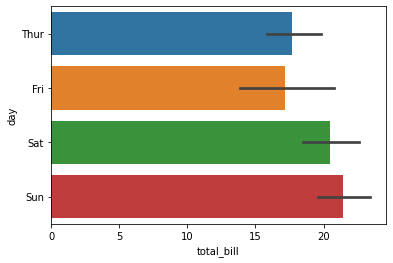

In [ ]:
sns.barplot(tips.total_bill, tips.day, ci = 95); # degrees of freedom'lar

3. Subset a dataframe just including Sunday tips

In [ ]:
tipsSun = tips[tips.day=='Sun']
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


4. Calculate mean and std

In [ ]:
tipsSun["total_bill"].mean()

21.410000000000004

In [ ]:
tipsSun["total_bill"].std()

8.832121828869889

5. Calculate standart error of the mean

In [ ]:
sem =  tipsSun["total_bill"].std() / np.sqrt(len(tipsSun))           # sample'ın ortalamasının erroru  # std / kökn 
sem

1.0131138555021968

6. Calculate the margin of error (95%)

In [ ]:
z = stats.norm.ppf(0.975)                              # 1.96 * se

In [ ]:
moe = z * sem
moe

1.9856666690228222

7. Calculate the upper confidence limit

In [ ]:
tipsSun["total_bill"].mean() + moe

23.395666669022827

8. Calculate the lower confidence limit

In [ ]:
tipsSun["total_bill"].mean() - moe

19.42433333097718

9. Calculate 95% Confidence Interval around the mean by using scipy.stats

In [ ]:
stats.norm.interval(0.95, loc= tipsSun["total_bill"].mean(), scale = sem)  # loc = merkezi ölçü

(19.42433333097718, 23.395666669022827)

### Exercise 8.7 (Large Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

- The shopping times of n = 64 randomly selected customers at a local supermarket were recorded. 

- The average and variance of the 64 shopping times were 33 $minutes$ and 256 $minutes^2$, respectively. 

- Estimate μ, the true average shopping time per customer, with a confidence coefficient of 1 − α = .90.

In [ ]:
n = 64
xbar = 33
var = 256
ci = 0.90
s = np.sqrt(var)

sem = s / np.sqrt(n) # standard error
sem

2.0

In [ ]:
stats.norm.interval(0.90, loc=xbar, scale=sem)

(29.710292746097053, 36.28970725390295)

#### Proof

![image.png](attachment:image.png)

In [ ]:
z = stats.norm.ppf(0.95)
z

1.6448536269514722

In [ ]:
moe = z * sem                 # moe = margin of error
moe

3.2897072539029444

In [ ]:
low_limit = xbar - moe
low_limit

29.710292746097057

In [ ]:
high_limit = xbar + moe 
high_limit

36.28970725390295

### Exercise 8.11 (Small Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

A manufacturer of gunpowder has developed a new powder, which was tested in eight shells. The resulting muzzle velocities, in feet per second, were as follows:

3005 2925 2935 2965

2995 3005 2937 2905

Find a 95% confidence interval for the true average velocity μ for shells of this type. Assume that muzzle velocities are approximately normally distributed.

In [ ]:
x = [3005, 2925, 2935, 2965, 2995, 3005, 2937, 2905]   # 8 tane örnek varsa n-1 den 7 olmalı df'miz

In [ ]:
# Sample size
n = 8

# Sample mean
xbar = np.mean(x)

# Sample standard deviation
s = np.std(x, ddof=1)

# Confidence level
cl = 0.95

In [ ]:
stats.t.interval(0.95, df=n-1, loc=xbar, scale=s / np.sqrt(n))  # tek satırda güven aralığı

(2926.3202426713874, 2991.6797573286126)

#### Proof

![image.png](attachment:image.png)

In [ ]:
t = stats.t.ppf(0.975, df=n-1)
t

2.3646242510102993

In [ ]:
sem = s / np.sqrt(n)
sem

13.820274961085254

In [ ]:
moe = t * sem
moe

32.67975732861261

In [ ]:
low_limit = xbar -moe 
low_limit

2926.3202426713874

In [ ]:
high_limit = xbar + moe 
high_limit

2991.6797573286126